In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import jaxqualin.postprocess
import jaxqualin.plot
import jaxqualin.qnmode

from jaxqualin.postprocess import *
from jaxqualin.plot import *
from jaxqualin.qnmode import *

In [4]:
from importlib import reload

In [5]:
reload(jaxqualin.postprocess)
from jaxqualin.postprocess import *
reload(jaxqualin.plot)
from jaxqualin.plot import *
reload(jaxqualin.qnmode) 
from jaxqualin.qnmode import *

In [6]:
import pandas as pd
from matplotlib import ticker 
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [7]:
runname = "normal2_prodB1"
df = pd.read_csv(f"../../pickle/data_frame/{runname}_physical.csv")
df_prime = pd.read_csv(f"../../pickle/data_frame/normal2_prodB3_physical.csv")

In [8]:
df_full = pd.concat([df, df_prime])

In [9]:
df_nonspin = df_full[((np.abs(df_full['chi_1_z']) < 0.01) & (np.abs(df_full['chi_2_z']) < 0.01))]

In [10]:
df = classify_modes(df_full)

In [11]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [12]:
cmap=cm.get_cmap('cividis')
normalizer=Normalize(0.2,0.95)
normalizer2 = Normalize(0.05, 0.25)

/tmp/ipykernel_1510564/3741438867.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('cividis')


Text(0, 0.5, '$\\chi_{\\rm rem}$')

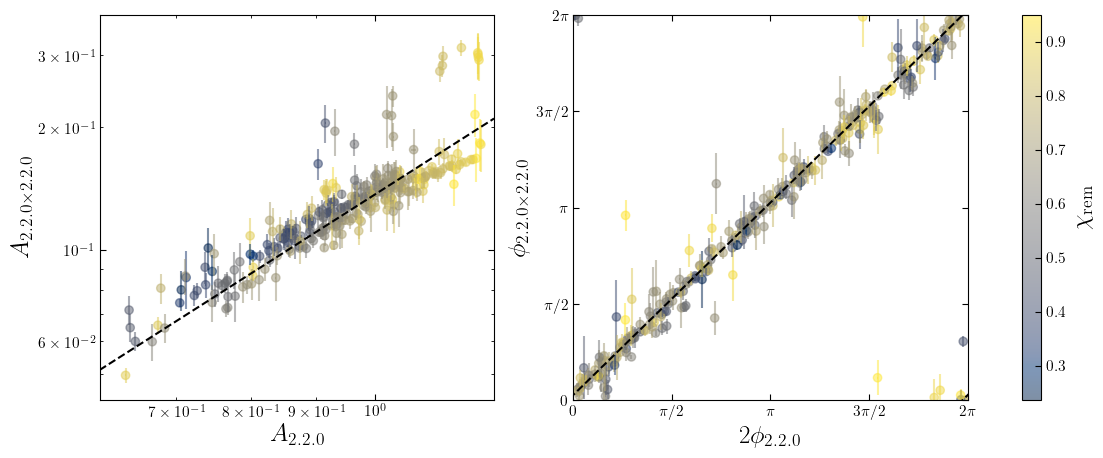

In [13]:
quad_l, quad_m = 4, 4
lin_l, lin_m = 2, 2
pro_quad_mode = "2.2.0x2.2.0"
pro_lin_mode = "2.2.0"
retro_quad_mode = qnm_string_l_reverse(pro_quad_mode)
retro_lin_mode = qnm_string_l_reverse(pro_lin_mode)

fig, axs = plt.subplots(1, 2, figsize = (14, 5))

beta_amp = plot_mode_vs_mode_amplitude(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                            lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                            fit_type = "quadratic",
                            fig = fig, ax = axs[0], colorbar = False, fit = True,
                            skip_num = [156, 1432], alpha = 0.5)
xsfit = np.linspace(*axs[0].get_xlim(), num = 100)
# ysfit = linfunc2([-0.829738], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit, c = "k", ls = "--")
# ysfit2 = linfunc2([np.log10(0.19)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit2, c = "k", ls = ":")
# ysfit3 = linfunc2([np.log10(0.17)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit3, c = "k", ls = "-.")
# ysfit4 = linfunc2([np.log10(0.1637)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit4, c = "k", ls = "-")
axs[0].plot()

sc, beta_phase = plot_mode_vs_mode_phase(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                             lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                             fit_type = "quadratic",
                             fig = fig, ax = axs[1], colorbar = False, return_sc = True,
                             fit = True,
                             skip_num = [156, 1432], alpha = 0.5)
# xsfit = np.linspace(0, 2*np.pi, num = 100)
# ysfit = xsfit + 0.105
# axs[1].plot(xsfit, ysfit, ls = "--", c = 'k')

cb = fig.colorbar(sc, ax = axs)
cb.ax.set_ylabel(r"$\chi_{\rm rem}$")

# plt.savefig(f"../../plots/{runname}_{pro_lin_mode}_{pro_quad_mode}.pdf", bbox_inches = "tight")

In [14]:
print(10**beta_amp[0])
print(beta_phase[0])

0.1370749313078982
0.08067233533098589


[-0.05198223  0.17040421]


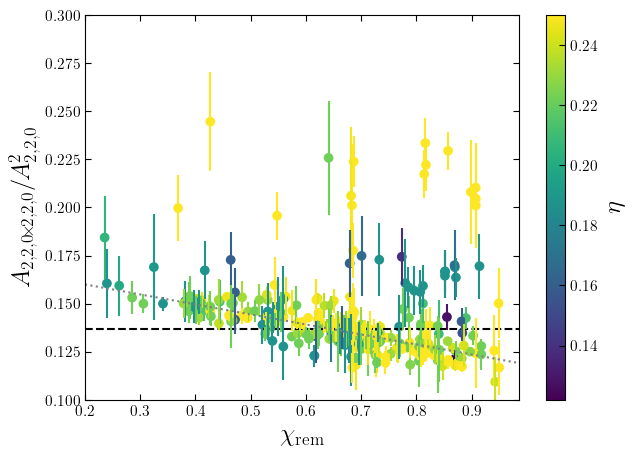

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.set_ylim(0.1, 0.3)
ax.axhline(10**beta_amp[0], ls = "--", c = "k")
out, outlier_SXS_nums = plot_mode_vs_mode_amplitude_quad_ratio(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                            lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                            fit_type = "quadratic", fit = True,
                            fig = fig, ax = ax, colorbar = True, skip_num = [156, 1432],
                            norm = normalizer, color_string = "eta")
ax.set_xlabel(r'$\chi_{\rm rem}$')
ax.set_ylabel(r'$A_{2{,}2{,}0 \! \times \! 2{,}2{,}0} / A_{2{,}2{,}0}^2$')

print(out[0])

# plt.savefig(f"../../plots/{runname}_{pro_lin_mode}_{pro_quad_mode}_ratio_eta_color.pdf", bbox_inches = "tight")

In [ ]:
outlier_SXS_nums

array([ 211,  225,  229,  231,  246, 1477, 1481,  154,  180,  198,  328,
       1122, 2104])

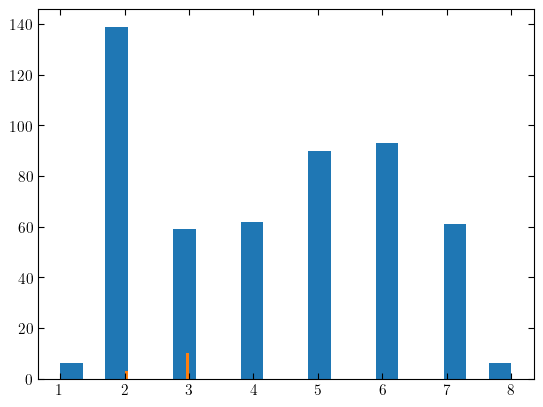

In [ ]:
visualize_outliers_n_modes(df, 4, 4, outlier_SXS_nums)

In [ ]:
visualize_outliers_individual_modes(df, 4, 4, outlier_SXS_nums)

Error in callback <function _draw_all_if_interactive at 0x1554fd19b9d0> (for post_execute):


KeyboardInterrupt: 

Text(0, 0.5, '$\\chi_{\\rm rem}$')

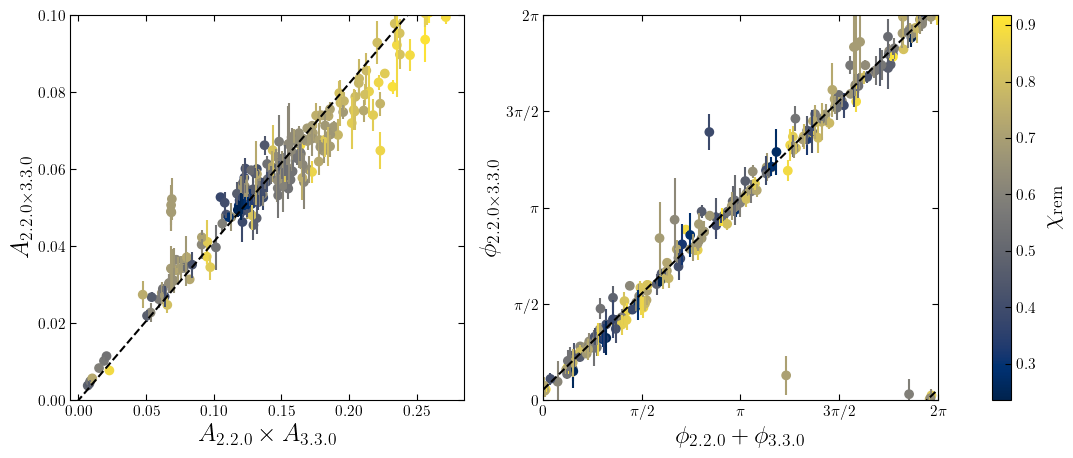

In [17]:
quad_l, quad_m = 5, 5
lin_l_1, lin_m_1 = 2, 2
lin_l_2, lin_m_2 = 3, 3
pro_quad_mode = "2.2.0x3.3.0"
pro_lin_mode_1 = "2.2.0"
pro_lin_mode_2 = "3.3.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode_1 = qnm_string_m_reverse(pro_lin_mode)
retro_lin_mode_2 = qnm_string_m_reverse(pro_lin_mode_2)

fig, axs = plt.subplots(1, 2, figsize = (14, 5))

beta_amp_2 = plot_mode_vs_lin_mode_ampltiude(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               ax = axs[0], colorbar = False, fit = True, skip_num = [184])
sc, beta_phase = plot_mode_vs_lin_mode_phase(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               ax = axs[1], colorbar = False, fit = True, return_sc = True)
axs[0].set_ylim(0.0, 0.1)
cb = fig.colorbar(sc, ax = axs)
cb.ax.set_ylabel(r"$\chi_{\rm rem}$")

# plt.savefig(f"../../plots/{runname}_{pro_lin_mode_1}_{pro_lin_mode_2}_{pro_quad_mode}.pdf", bbox_inches = "tight")

In [18]:
print(beta_amp)
print(beta_phase)

[-0.86304196]
[0.17234501]


(array([-0.05198223,  0.17040421]), array([[ 1.98114458e-06, -1.30702647e-06],
       [-1.30702647e-06,  8.96463768e-07]]))
[-0.08638679  0.46624216]


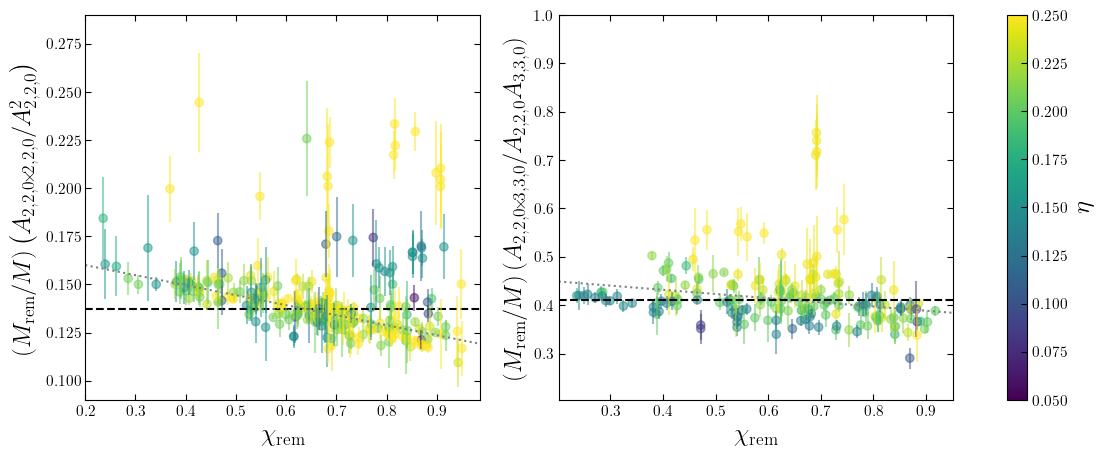

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (14, 5))
alpha = 0.5

ax = axs[0]

quad_l, quad_m = 4, 4
lin_l, lin_m = 2, 2
pro_quad_mode = "2.2.0x2.2.0"
pro_lin_mode = "2.2.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode = qnm_string_m_reverse(pro_lin_mode)

ax.set_ylim(0.09, 0.29)
ax.axhline(10**beta_amp[0], ls = "--", c = "k")
out = plot_mode_vs_mode_amplitude_quad_ratio(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                            lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                            fit_type = "quadratic", fit = True,
                            fig = fig, ax = ax, colorbar = False, skip_num = [156, 1432],
                            norm = normalizer2, alpha = alpha)
ax.set_xlabel(r'$\chi_{\rm rem}$')
ax.set_ylabel(r'$\left(M_{\rm rem}/M\right)\left(A_{2{,}2{,}0 \! \times \! 2{,}2{,}0} / A_{2{,}2{,}0}^2\right)$')

print(out[0])

quad_l, quad_m = 5, 5
lin_l_1, lin_m_1 = 2, 2
lin_l_2, lin_m_2 = 3, 3
pro_quad_mode = "2.2.0x3.3.0"
pro_lin_mode_1 = "2.2.0"
pro_lin_mode_2 = "3.3.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode_1 = qnm_string_m_reverse(pro_lin_mode)
retro_lin_mode_2 = qnm_string_m_reverse(pro_lin_mode_2)

ax = axs[1]

out = plot_mode_vs_lin_mode_ratio(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               fig = fig, ax = ax, colorbar = False, fit = True,
                               norm = normalizer2, alpha = alpha, skip_num = [184])
ax.set_ylim(None, 1)
ax.axhline(beta_amp_2[0], ls = "--", c = "k")
ax.set_xlabel(r'$\chi_{\rm rem}$')
ax.set_ylabel(r'$\left(M_{\rm rem}/M\right)\left(A_{2{,}2{,}0 \! \times \! 3{,}3{,}0} / A_{2{,}2{,}0} A_{3{,}3{,}0}\right)$')

print(out[0])

im=cm.ScalarMappable(norm=normalizer2, cmap='viridis')

cb = fig.colorbar(im, ax = axs)
cb.ax.set_ylabel(r"$\eta$")



plt.savefig(f"../../plots/quad_ratio_eta_color_alpha_{alpha}.pdf", bbox_inches = "tight")

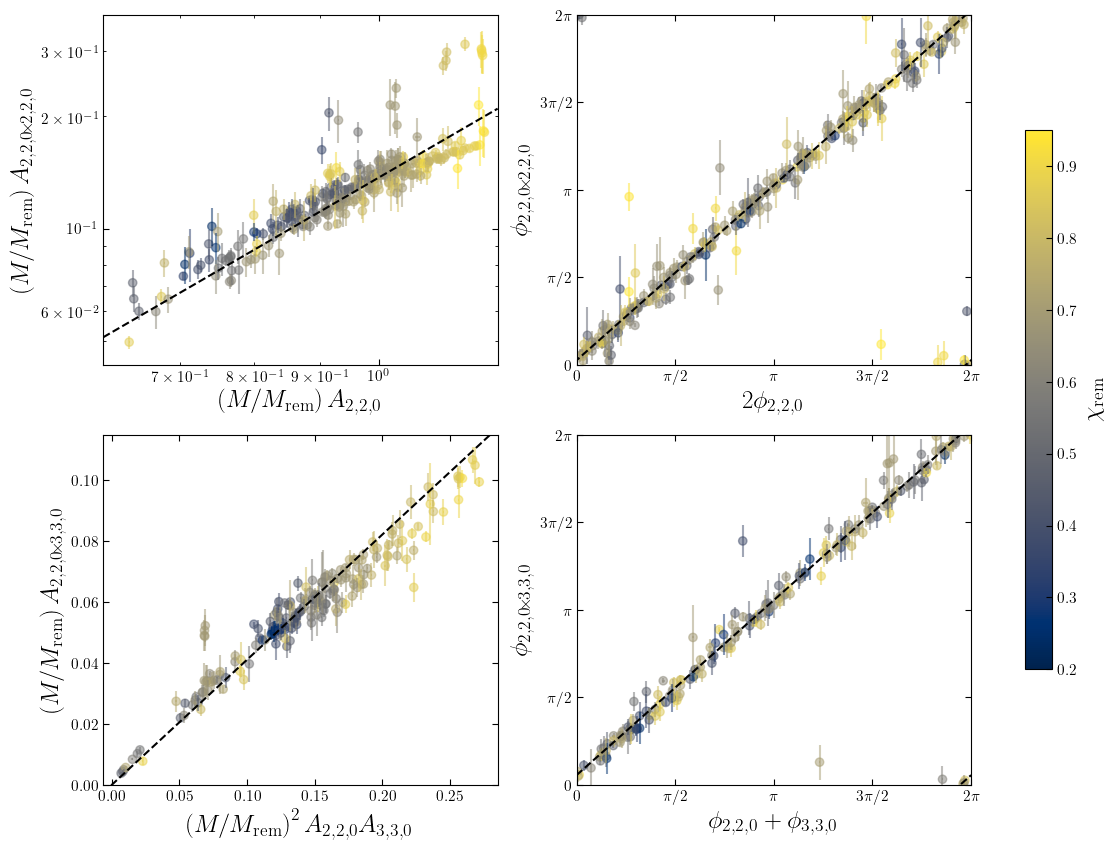

In [27]:
quad_l, quad_m = 4, 4
lin_l, lin_m = 2, 2
pro_quad_mode = "2.2.0x2.2.0"
pro_lin_mode = "2.2.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode = qnm_string_m_reverse(pro_lin_mode)

fig, axs = plt.subplots(2, 2, figsize = (14, 10))
alpha = 0.5

beta_amp = plot_mode_vs_mode_amplitude(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                            lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                            fit_type = "quadratic",
                            fig = fig, ax = axs[0,0], colorbar = False, fit = True,
                            skip_num = [156, 1432],
                            norm = normalizer, alpha = alpha)

sc, beta_phase = plot_mode_vs_mode_phase(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                             lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                             fit_type = "quadratic",
                             fig = fig, ax = axs[0,1], colorbar = False, return_sc = True,
                             fit = True,
                             skip_num = [156, 1432],
                             norm = normalizer, alpha = alpha)

# cb = fig.colorbar(sc, ax = axs)
# cb.ax.set_ylabel(r"$\chi_{\rm rem}$")

quad_l, quad_m = 5, 5
lin_l_1, lin_m_1 = 2, 2
lin_l_2, lin_m_2 = 3, 3
pro_quad_mode = "2.2.0x3.3.0"
pro_lin_mode_1 = "2.2.0"
pro_lin_mode_2 = "3.3.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode_1 = qnm_string_m_reverse(pro_lin_mode)
retro_lin_mode_2 = qnm_string_m_reverse(pro_lin_mode_2)

beta_amp_2 = plot_mode_vs_lin_mode_ampltiude(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               ax = axs[1,0], colorbar = False, fit = True,
                               norm = normalizer, alpha = alpha, skip_num = [184])
sc1, beta_phase = plot_mode_vs_lin_mode_phase(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                               lin_l_1, lin_m_1, pro_lin_mode_1, retro_lin_mode_1,
                               lin_l_2, lin_m_2, pro_lin_mode_2, retro_lin_mode_2,
                               ax = axs[1,1], colorbar = False, fit = True, return_sc = True,
                            norm = normalizer, alpha = alpha, skip_num=[184])
axs[1,0].set_ylim(0.0, 0.115)


im=cm.ScalarMappable(norm=normalizer, cmap=cmap)

cb = fig.colorbar(im, ax = axs, shrink = 0.7)
cb.ax.set_ylabel(r"$\chi_{\rm rem}$")

axs[0,0].set_xlabel(r'$\left(M/M_{\rm rem}\right)A_{2{,}2{,}0}$')
axs[0,0].set_ylabel(r'$\left(M/M_{\rm rem}\right)A_{2{,}2{,}0 \! \times \! 2{,}2{,}0}$')
axs[0,1].set_xlabel(r'$2\phi_{2{,}2{,}0}$')
axs[0,1].set_ylabel(r'$\phi_{2{,}2{,}0 \! \times \! 2{,}2{,}0}$')
axs[1,0].set_xlabel(r'$\left(M/M_{\rm rem}\right)^2 A_{2{,}2{,}0}A_{3{,}3{,}0}$')
axs[1,0].set_ylabel(r'$\left(M/M_{\rm rem}\right)A_{2{,}2{,}0 \! \times \! 3{,}3{,}0}$')
axs[1,1].set_xlabel(r'$\phi_{2{,}2{,}0} + \phi_{3{,}3{,}0}$')
axs[1,1].set_ylabel(r'$\phi_{2{,}2{,}0 \! \times \! 3{,}3{,}0}$')

plt.savefig(f"../../plots/{runname}_quad_merged_alpha_{alpha}.pdf", bbox_inches = "tight")